In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import corner.corner

from impulse.base import pt_sample

# test model things:
from test_model import make_sin_data, LnLikelihood, LnPrior

from impulse.pta_utils import initial_sample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
x, data, omega_real, a_real, phi_real = make_sin_data(1000)

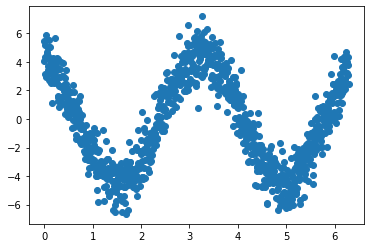

In [10]:
plt.scatter(x, data)

In [11]:
like = LnLikelihood(x, data)
prior = LnPrior([0, 0, 0], [3, 5, np.pi])

In [12]:
x0 = prior.initial_sample()
ndim = len(x0)

In [74]:
ntemps = 8
chain = pt_sample(like, prior, ndim, [x0 for _ in range(ntemps)], tinf=True, ntemps=ntemps, num_samples=200_000, adapt_t0=10, adapt_nu=100, swap_count=100)

 46%|████▋     | 93/200 [01:06<01:08,  1.56it/s]/Users/aaron/Documents/GitHub/impulse_mcmc/impulse/proposals.py:252: RuntimeWarning: invalid value encountered in double_scalars
  q[groups[jumpind][ii]] += scale * sigma
/Users/aaron/Documents/GitHub/impulse_mcmc/impulse/mhsampler.py:63: RuntimeWarning: invalid value encountered in double_scalars
  lnprob_star = 1 / self.temp * lnlike_star + lnprior_star
100%|██████████| 200/200 [02:18<00:00,  1.45it/s]


In [75]:
burn = int(0.25 * chain.shape[0])
omega = np.median(chain[burn:, 0, 0])
a = np.median(chain[burn:, 1, 0])
phi = np.median(chain[burn:, 2, 0])

In [76]:
print(omega, omega_real)
print(a, a_real)
print(phi, phi_real)

1.845263096636733 1.8406211356604643
4.443890824672913 4.471806106558393
1.8852830379236523 1.8862005610208967


In [77]:
with open('./data/temps.txt', 'r') as f:
    temps = np.loadtxt(f)

with open('./data/accept.txt', 'r') as f:
    accept = np.loadtxt(f)

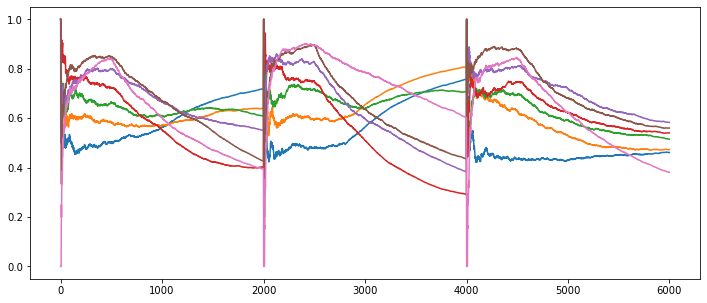

In [78]:
plt.figure(figsize=(12, 5))
for ii in range(ntemps - 1):
    # plt.plot(temps[:, ii])
    plt.plot(accept[:, ii])

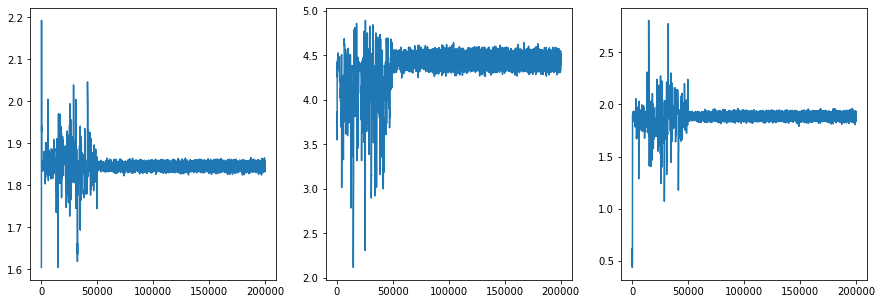

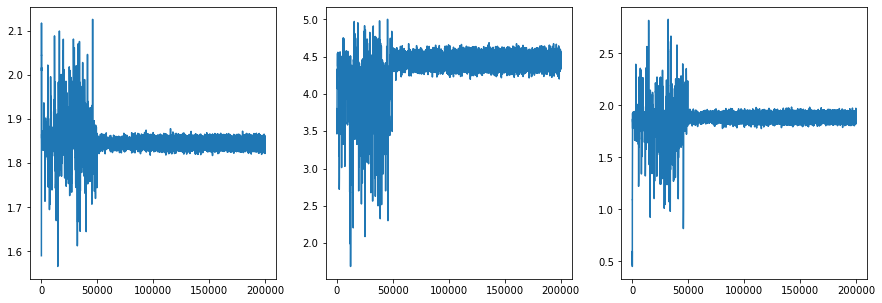

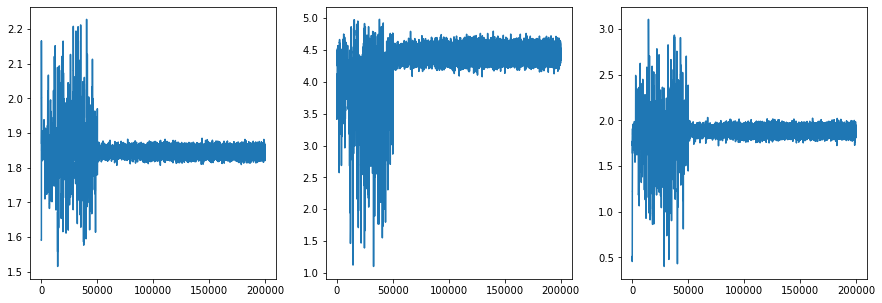

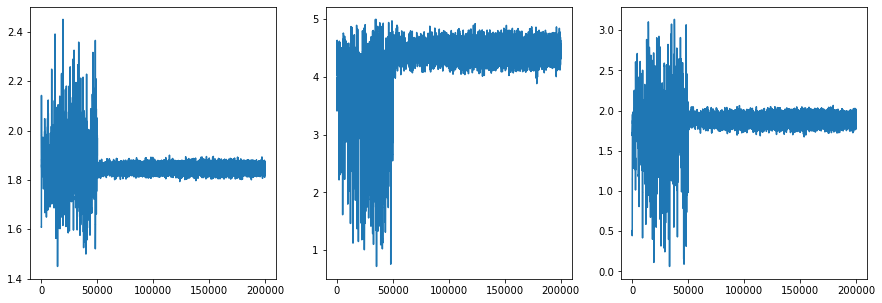

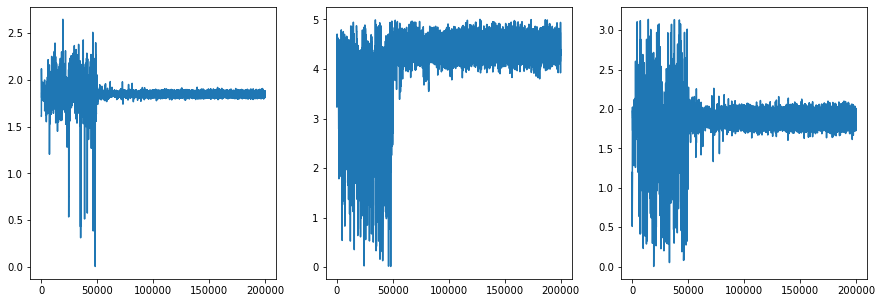

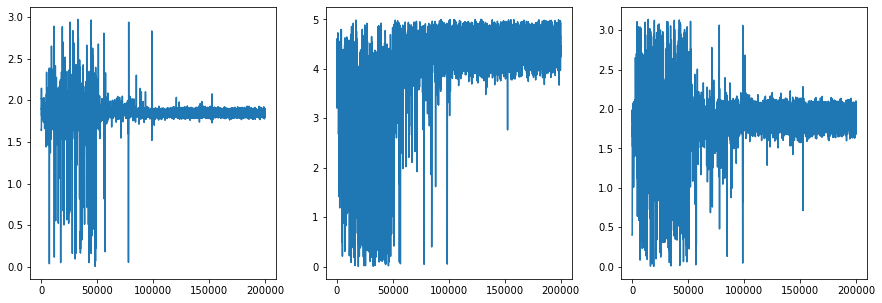

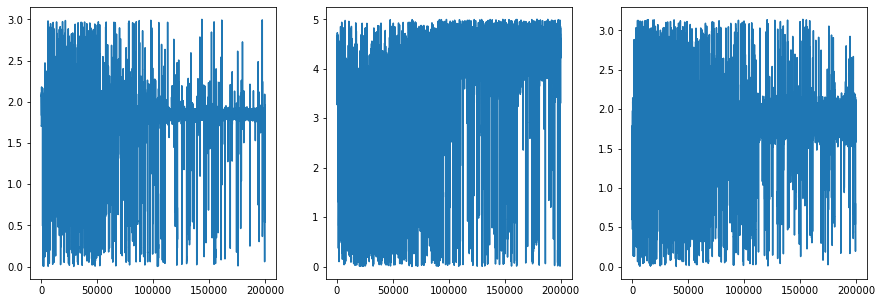

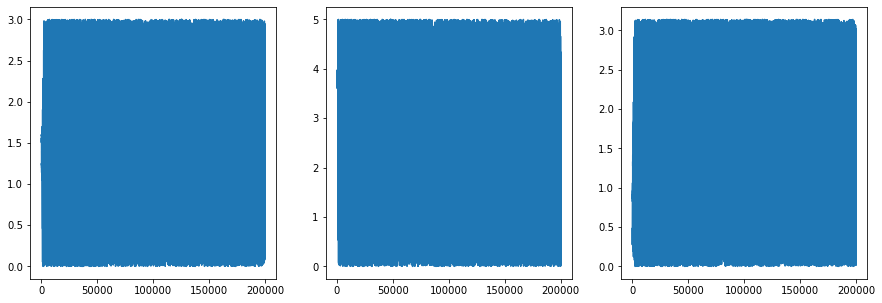

In [79]:
for ii in range(ntemps):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].plot(chain[:, 0, ii])
    ax[1].plot(chain[:, 1, ii])
    ax[2].plot(chain[:, 2, ii])
    plt.show()

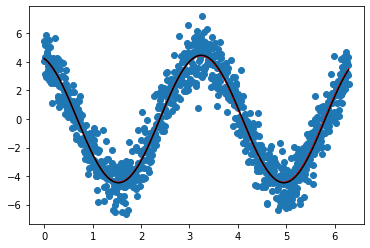

In [45]:
plt.scatter(x, data)
plt.plot(x, a * np.sin(omega * x + phi), color='red')
plt.plot(x, a_real * np.sin(omega_real * x + phi_real), color='black')

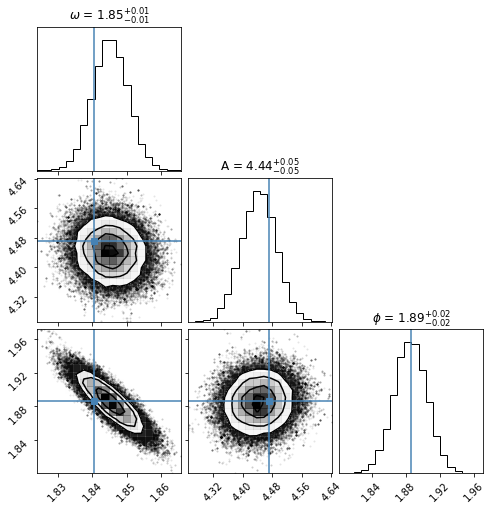

In [46]:
corner.corner(chain[burn:, :, 0], truths=[omega_real, a_real, phi_real],
              titles=[r'$\omega$', r'A', r'$\phi$'], show_titles=True)
plt.show()

In [47]:
print(omega_real, a_real, phi_real)
print(omega, a, phi)

1.8406211356604643 4.471806106558393 1.8862005610208967
1.8452072426100716 4.443952738898591 1.885280935107546
